## EDA And Feature Engineering Of Google Play Store Dataset

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2) Data Collection.

The data consists of 20 column and 10841 rows.

##### Steps we are going to do Follow

1. Data Cleaning
2. Exploratory Data Analysis
3. Feature Engineering

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [67]:
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# Summary of the dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
# Missing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Insights and Observation

The dataset has missing values

In [8]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


### **Data Cleaning**

In [9]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6002,), dtype=object)

In [14]:
df['Reviews'].astype(int)

ValueError: invalid literal for int() with base 10: '3.0M'

In [11]:
df['Reviews'].str.isnumeric().sum()
# df['Reviews'] → selects the Reviews column
# .str → allows string operations on the column
# .isnumeric() → checks whether each value contains only numbers
# Returns True if value is numeric, False otherwise
# .sum() → counts how many True values are present
# Final result → total number of numeric review values

np.int64(10840)

In [ ]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
df_copy = df.copy()

In [21]:
df_copy = df_copy.drop(df_copy.index[10472])
# df_copy.index[10472] → gets the label of the row at position 10472
# df_copy.drop(...) → removes that specific row from the DataFrame
# This is used to delete an unwanted or incorrect data entry
# df_copy = ... → saves the updated DataFrame after dropping the row

In [22]:
df_copy[~df['Reviews'].str.isnumeric()]
# df['Reviews'] → selects the Reviews column
# .str → allows string operations on the column
# .isnumeric() → checks if each value contains only digits
# Returns True for numeric values, False for non-numeric values
# ~ (tilde) → reverses the condition (NOT operator)
# True becomes False, False becomes True
# df_copy[...] → filters rows based on the condition
# Final result → shows rows where Reviews are NOT numeric

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [23]:
# convert Review Datatype to int

df_copy['Reviews'] = df_copy['Reviews'].astype(int)

In [24]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9365 non-null   float64
 3   Reviews         10839 non-null  int64  
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  object 
 6   Type            10838 non-null  object 
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [25]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [29]:
df_copy['Size'].isnull().sum()

np.int64(0)

In [34]:
df_copy['Size'] = df_copy['Size'].replace('Varies with device', np.nan)
# Replace text value with NaN so it can be ignored in numeric conversion

df_copy['Size'] = df_copy['Size'].str.replace('M', '000')
# Converts megabytes to kilobytes (e.g., 19M → 19000)

df_copy['Size'] = df_copy['Size'].str.replace('k', '')
# Removes 'k' so only numbers remain

df_copy['Size'] = df_copy['Size'].astype(float)
# Converts cleaned Size column into float type

In [35]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9365 non-null   float64
 3   Reviews         10839 non-null  int64  
 4   Size            9144 non-null   float64
 5   Installs        10839 non-null  object 
 6   Type            10838 non-null  object 
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [36]:
df_copy['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10839, dtype: float64

In [40]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [41]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [45]:
chars_to_remove = ['+', ',', '$']
# List of unwanted characters to be removed from the data

cols_to_clean = ['Installs', 'Price']
# Columns where these unwanted characters are present

for item in chars_to_remove:
  # Loop through each unwanted character

  for cols in cols_to_clean:
    # Loop through each selected column

    df_copy[cols] = df_copy[cols].str.replace(item, '')
    # Removes the current unwanted character from the column values

In [46]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [47]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [48]:
df_copy['Installs'] = df_copy['Installs'].astype('int')
df_copy['Price'] = df_copy['Price'].astype('float')

In [50]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9365 non-null   float64
 3   Reviews         10839 non-null  int64  
 4   Size            9144 non-null   float64
 5   Installs        10839 non-null  int64  
 6   Type            10838 non-null  object 
 7   Price           10839 non-null  float64
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [51]:
# Handling the last update feature

df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      shape=(1377,), dtype=object)

In [52]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])
df_copy['Day'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year

In [53]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10839 non-null  object        
 1   Category        10839 non-null  object        
 2   Rating          9365 non-null   float64       
 3   Reviews         10839 non-null  int64         
 4   Size            9144 non-null   float64       
 5   Installs        10839 non-null  int64         
 6   Type            10838 non-null  object        
 7   Price           10839 non-null  float64       
 8   Content Rating  10839 non-null  object        
 9   Genres          10839 non-null  object        
 10  Last Updated    10839 non-null  datetime64[ns]
 11  Current Ver     10831 non-null  object        
 12  Android Ver     10837 non-null  object        
 13  Day             10839 non-null  int32         
 14  Month           10839 non-null  int32         
 15  Year   

In [55]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [58]:
df_copy.to_csv('data/google_Cleaned.csv')

In [ ]:
## **EDA**

In [59]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [62]:
df[df.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [64]:
df_copy[df_copy.duplicated('App')].shape

(1180, 16)

#### Observation
The dataset has duplicate records

In [71]:
df_copy = df_copy.drop_duplicates(subset=['App'], keep='first')
# df_copy.drop_duplicates() → removes duplicate rows
# subset=['App'] → checks duplicates only in the App column
# keep='first' → keeps the first occurrence of each App
# Other duplicate rows of the same App are removed
# df_copy = ... → saves the cleaned DataFrame

In [72]:
df_copy.shape

(9659, 16)

### Explore Data

In [74]:
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
# Selects columns whose data type is NOT object (numeric columns)

categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']
# Selects columns whose data type is object (categorical columns)

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
# Prints total count and names of numerical features

print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))
# Prints total count and names of categorical features

We have 9 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']
We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


## Feature Information
1. App: Name of the App

2. Category: Category under which the App falls.

3. Rating: Application's rating on playstore

4. Reviews: Number of reviews of the App.

5. Size: Size of the App.

6. Install: Number of Installs of the App

7. Type: If the App is free/paid

8. Price: Price of the app (0 if it is Free)

9. Content Rating: Appropiate Target Audience of the App.

10. Genres: Genre under which the App falls.

11. Last Updated: Date when the App was last updated

12. Current Ver:- Current Version of the Application

13. Android Ver:- Minimum Android Version required to run the App

In [ ]:
# Proportion of count data on categorical columns

for col in categorical_features: # Loop through each categorical column

  print(df[col].value_counts(normalize=True) * 100)
  # value_counts() → counts occurrences of each category
  # normalize=True → converts counts into proportions
  # * 100 → converts proportion into percentage

  print('-----------------------------')

App
ROBLOX                                               0.083018
CBS Sports App - Scores, News, Stats & Watch Live    0.073794
Duolingo: Learn Languages Free                       0.064570
Candy Crush Saga                                     0.064570
8 Ball Pool                                          0.064570
                                                       ...   
Fr. Daoud Lamei                                      0.009224
Poop FR                                              0.009224
PLMGSS FR                                            0.009224
List iptv FR                                         0.009224
Kids Paint Free - Drawing Fun                        0.009224
Name: proportion, Length: 9660, dtype: float64
-----------------------------
Category
FAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSINESS                4.243151
PRODUCTIVITY            3.911078
PERSONALIZATION         3.6159

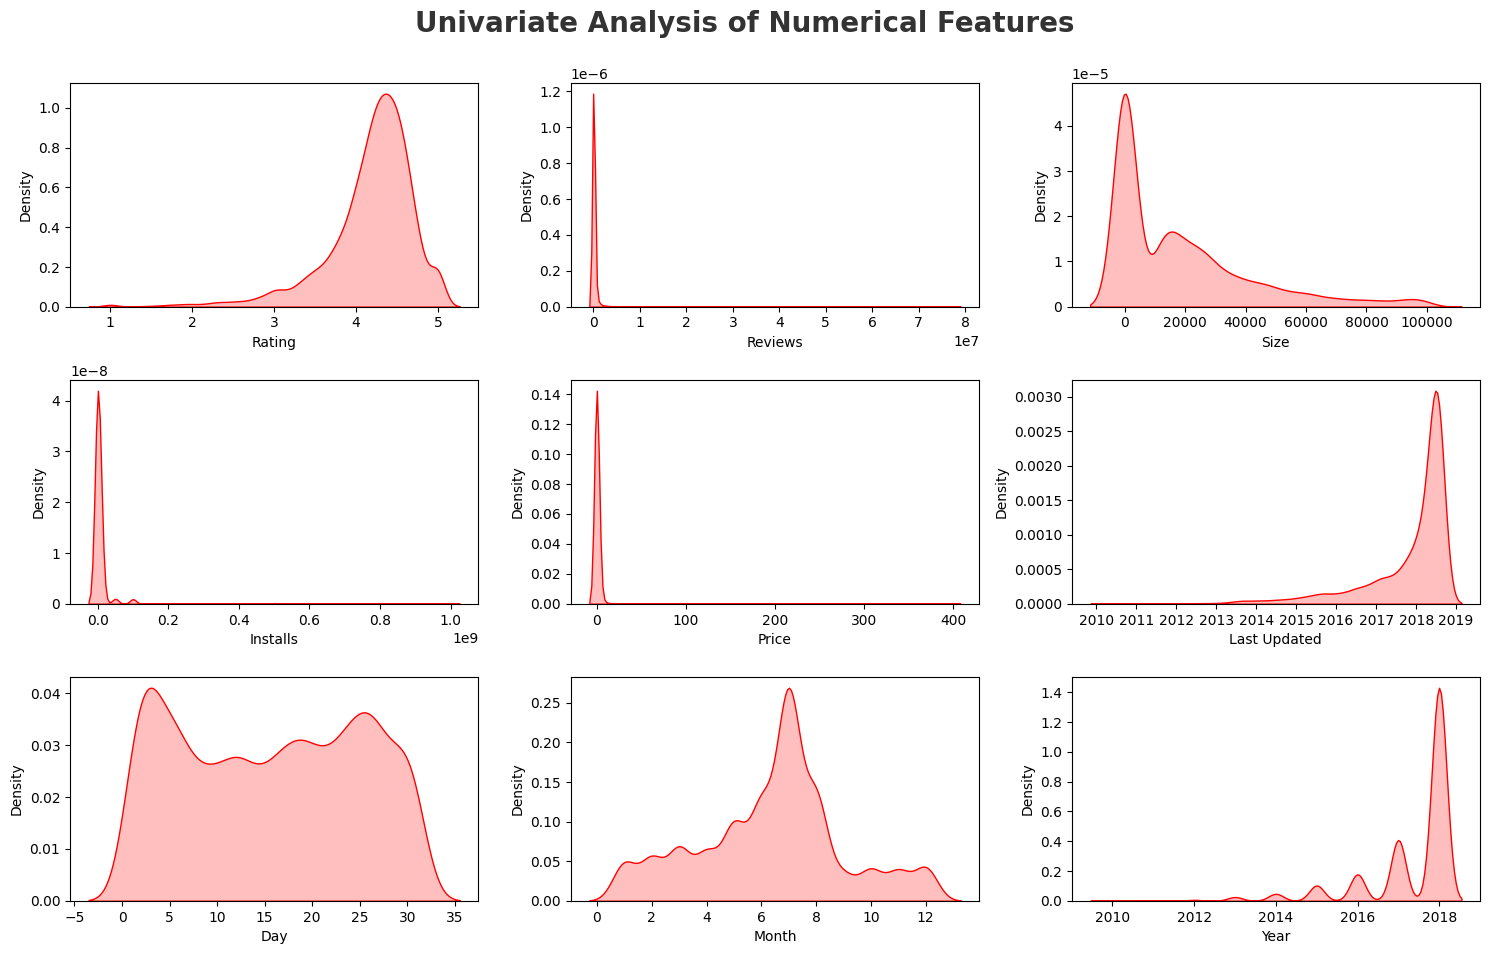

In [79]:
# Proportion of count data on numerical columns

plt.figure(figsize=(15, 15))
# Creates a large figure for multiple plots

plt.suptitle(
    'Univariate Analysis of Numerical Features',
    fontsize=20,
    fontweight='bold',
    alpha=0.8,
    y=1.0
)
# Adds a main title for all subplots

for i in range(0, len(numeric_features)):
  # Loop through all numerical features

  plt.subplot(5, 3, i + 1)
  # Creates a grid of 5 rows and 3 columns of subplots

  sns.kdeplot(x=df_copy[numeric_features[i]], shade=True, color='r')
  # Draws KDE (distribution) plot for the numerical feature

  plt.xlabel(numeric_features[i])
  # Sets x-axis label as feature name

  plt.tight_layout()
  # Adjusts spacing to avoid over


### Observations
- Rating and Year is left skewed while Reviews, Size, Installs and Price are right skewed

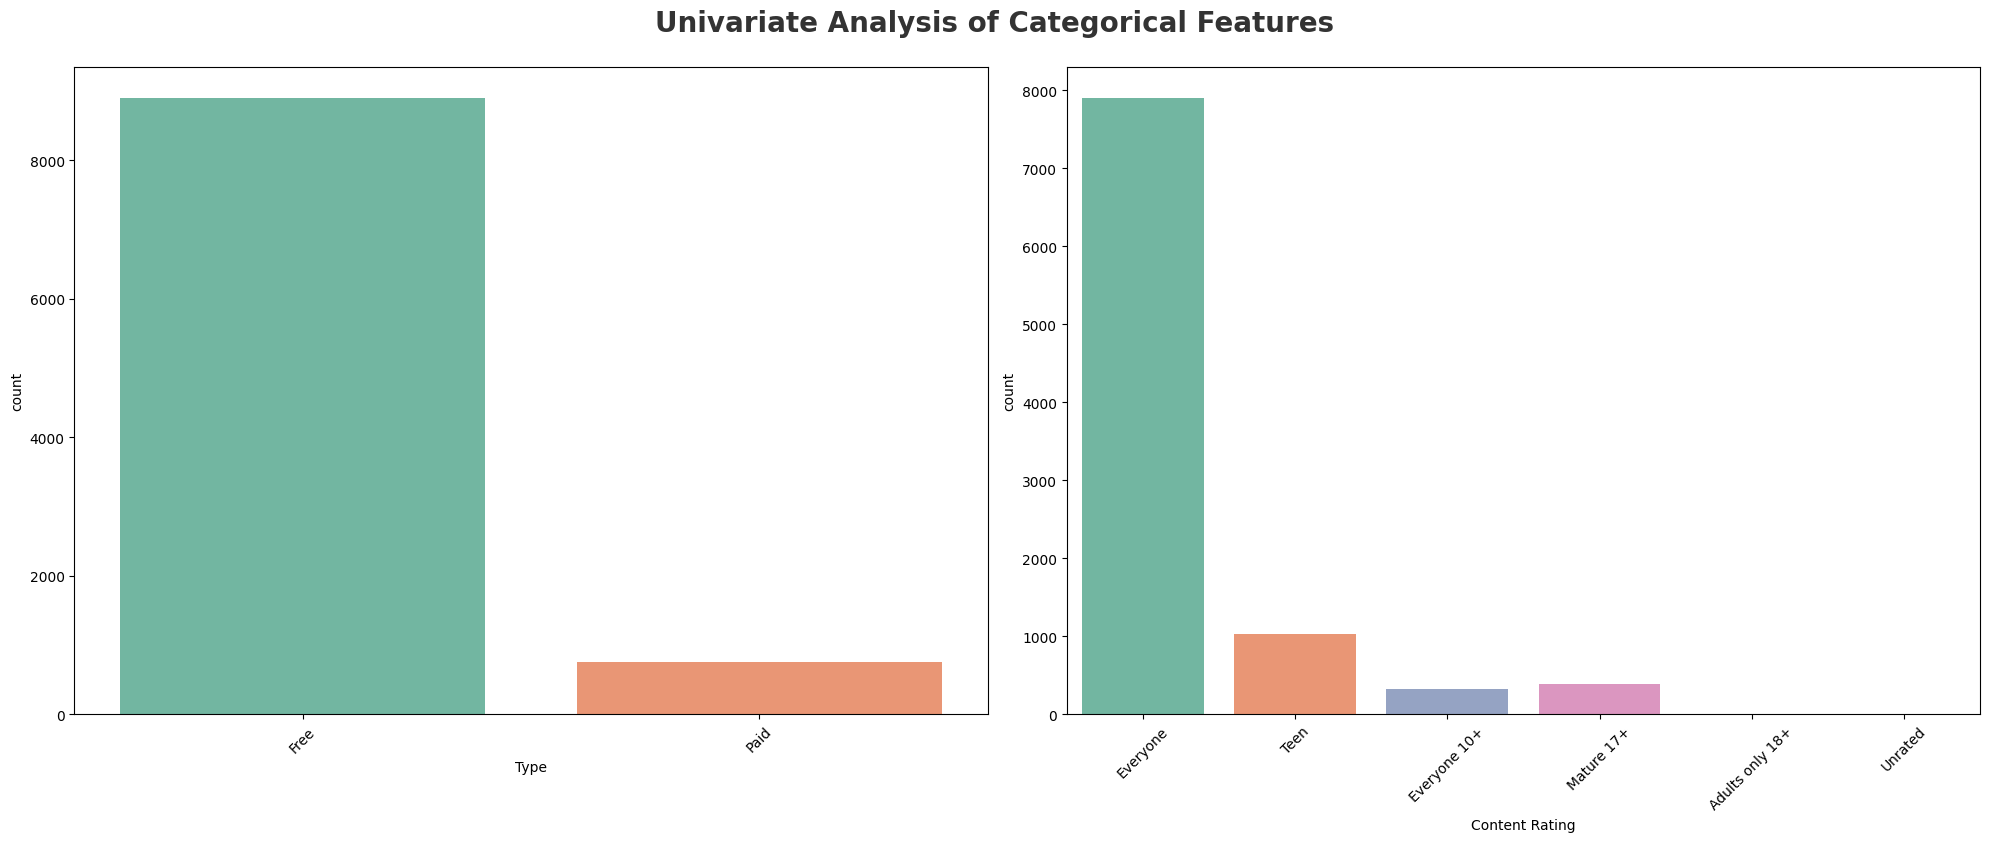

In [80]:
# Proportion of count data on categorical columns

plt.figure(figsize=(20, 15))
# Creates a large figure for multiple plots

plt.suptitle(
    'Univariate Analysis of Categorical Features',
    fontsize=20,
    fontweight='bold',
    alpha=0.8,
    y=1.0
)
# Adds a main title for all subplots

category = ['Type', 'Content Rating']
# List of categorical columns to analyze

for i in range(0, len(category)):
  # Loop through categorical features

  plt.subplot(2, 2, i + 1)
  # Creates subplot grid (2 rows, 2 columns)

  sns.countplot(x=df_copy[category[i]], palette="Set2")
  # Draws count plot (best for categorical data)

  plt.xlabel(category[i])
  # Sets x-axis label

  plt.xticks(rotation=45)
  # Rotates x-axis labels for readability

  plt.tight_layout()
  # Adjusts spacing to avoid overlap

## Which is the most popular app category ? 

In [81]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


<Axes: ylabel='count'>

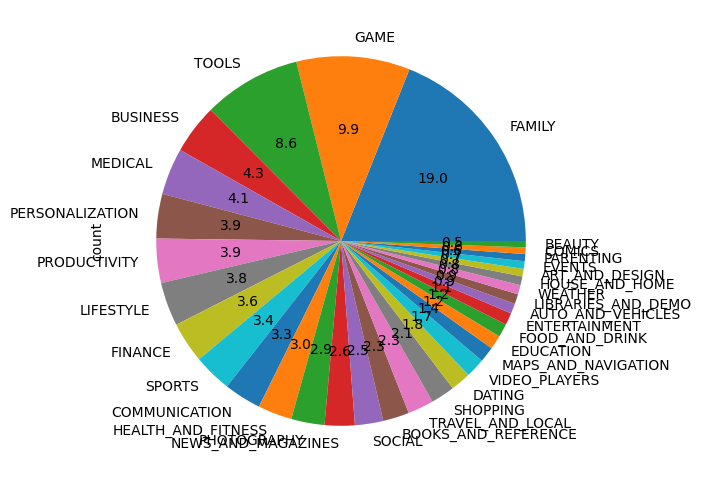

In [83]:
df_copy['Category'].value_counts().plot.pie(y = df['Category'], figsize = (15,6), autopct = '%1.1f')

### Observations
1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beauty, comics, arts and weather kinds of apps are very less in playstore

In [86]:
## Top 10 App Categories

category = pd.DataFrame(df['Category'].value_counts())
# df['Category'] → selects the Category column
# value_counts() → counts how many times each category appears
# pd.DataFrame(...) → converts the result into a DataFrame

category.rename(columns={'Category': 'Count'}, inplace=True)
# rename() → changes column name
# 'Category' → old column name (count values column)
# 'Count' → new column name
# inplace=True → applies the change permanently

In [85]:
category

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


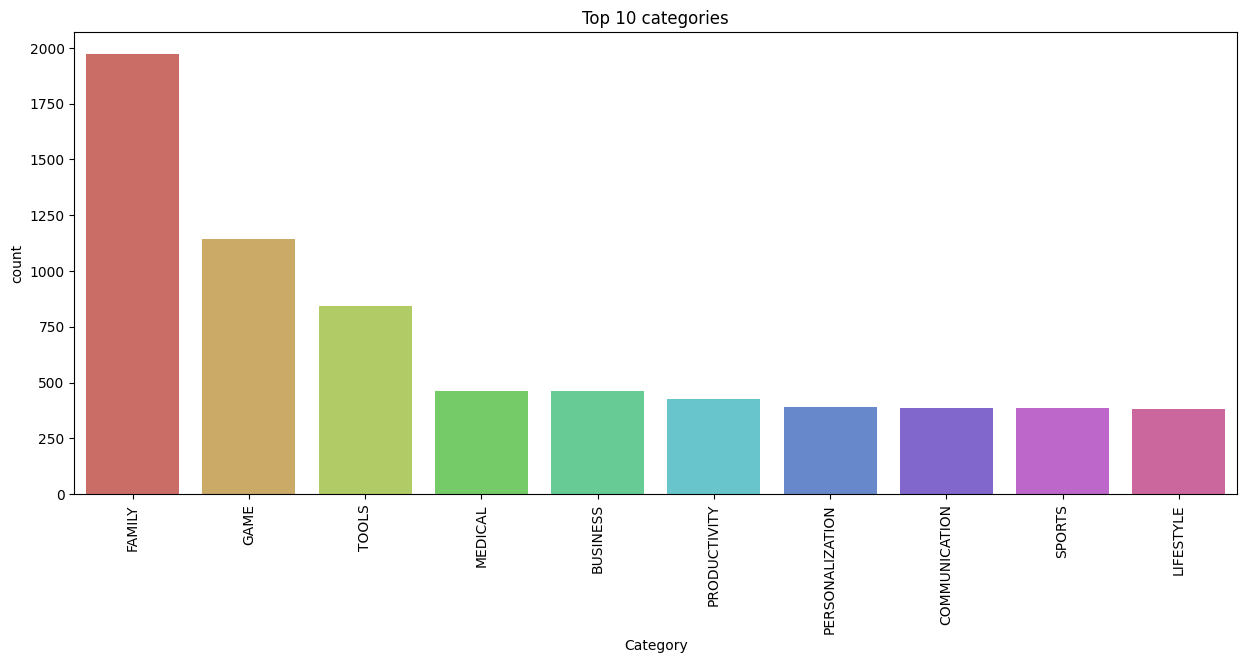

In [94]:
plt.figure(figsize=(15, 6))
# Creates a figure with width 15 and height 6

sns.barplot(
    x=category.index[:10],
    y='count',
    data=category[:10],
    palette='hls'
)
# Draws a bar plot for top 10 categories
# x-axis → category names (index)
# y-axis → Count of apps
# data → first 10 rows of category DataFrame

plt.title('Top 10 categories')
# Sets the title of the plot

plt.xticks(rotation=90)
# Rotates x-axis labels vertically for readability

plt.show()
# Displays the plot


#### Insights:
1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

## Which Category has largest number of installations??

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

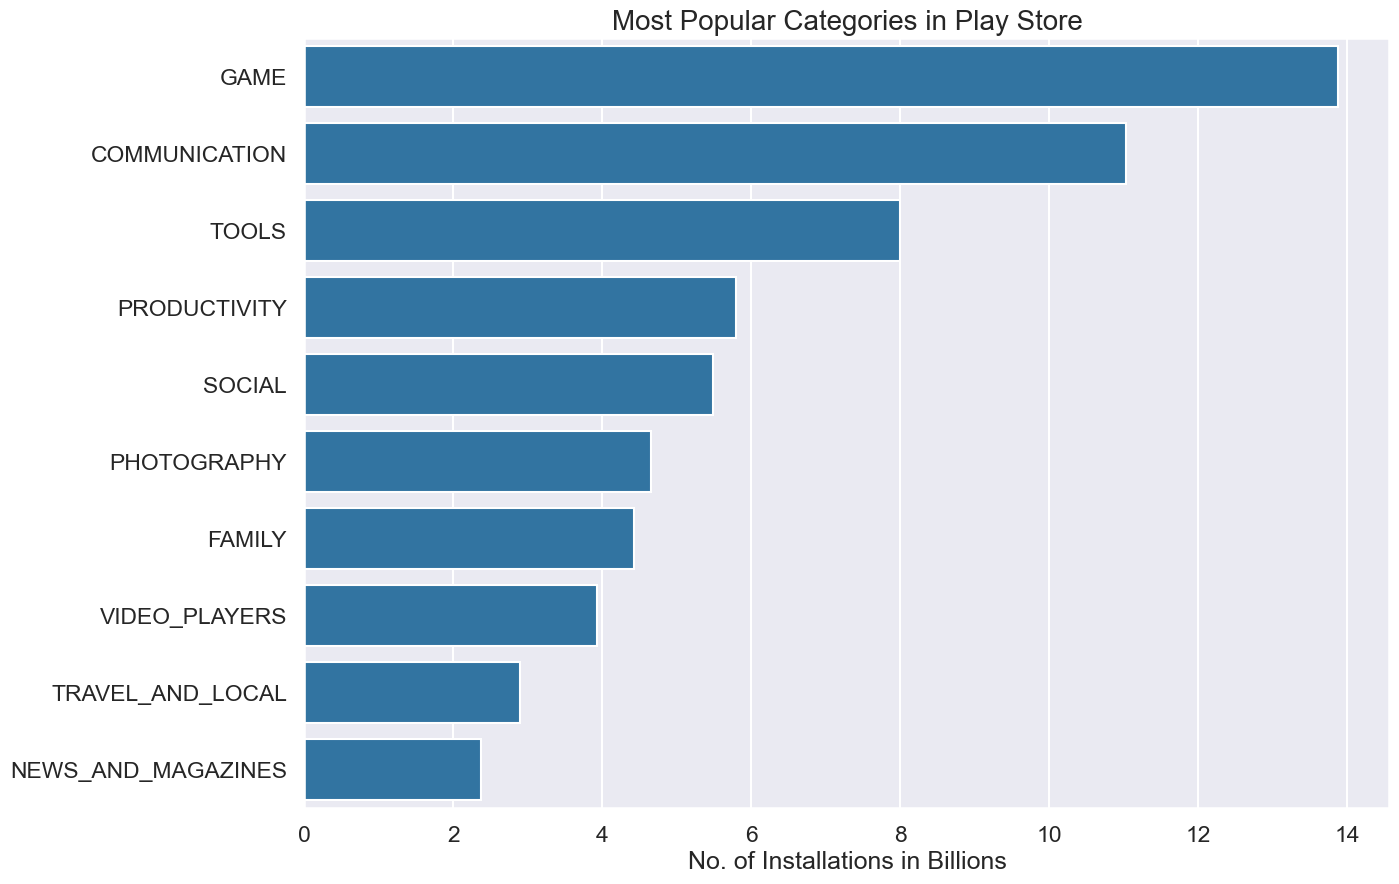

In [99]:
df_cat_installs = df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()
# Groups data by Category
# Sums total installs for each category
# Sorts categories by installs in descending order
# reset_index() converts index back into a normal column

df_cat_installs.Installs = df_cat_installs.Installs / 1000000000
# Converts installation count into billions for better readability

df2 = df_cat_installs.head(10)
# Selects top 10 categories with highest installs

plt.figure(figsize=(14, 10))
# Creates a large figure for the plot

sns.set_context("talk")
# Increases font size for better visibility

sns.set_style("darkgrid")
# Applies dark grid style to the plot

ax = sns.barplot(x='Installs', y='Category', data=df2)
# Creates a horizontal bar plot
# x-axis → total installs (in billions)
# y-axis → app categories

ax.set_xlabel('No. of Installations in Billions')
# Sets label for x-axis

ax.set_ylabel('')
# Removes y-axis label

ax.set_title("Most Popular Categories in Play Store", size=20)
# Sets the title of the plot

## Insights
1. Out of all the categories "GAME" has the most number of Installations.
2. With almost 35 Billion Installations GAME is the most popular Category in Google App store

## What are the Top 5 most installed Apps in Each popular Categories ??

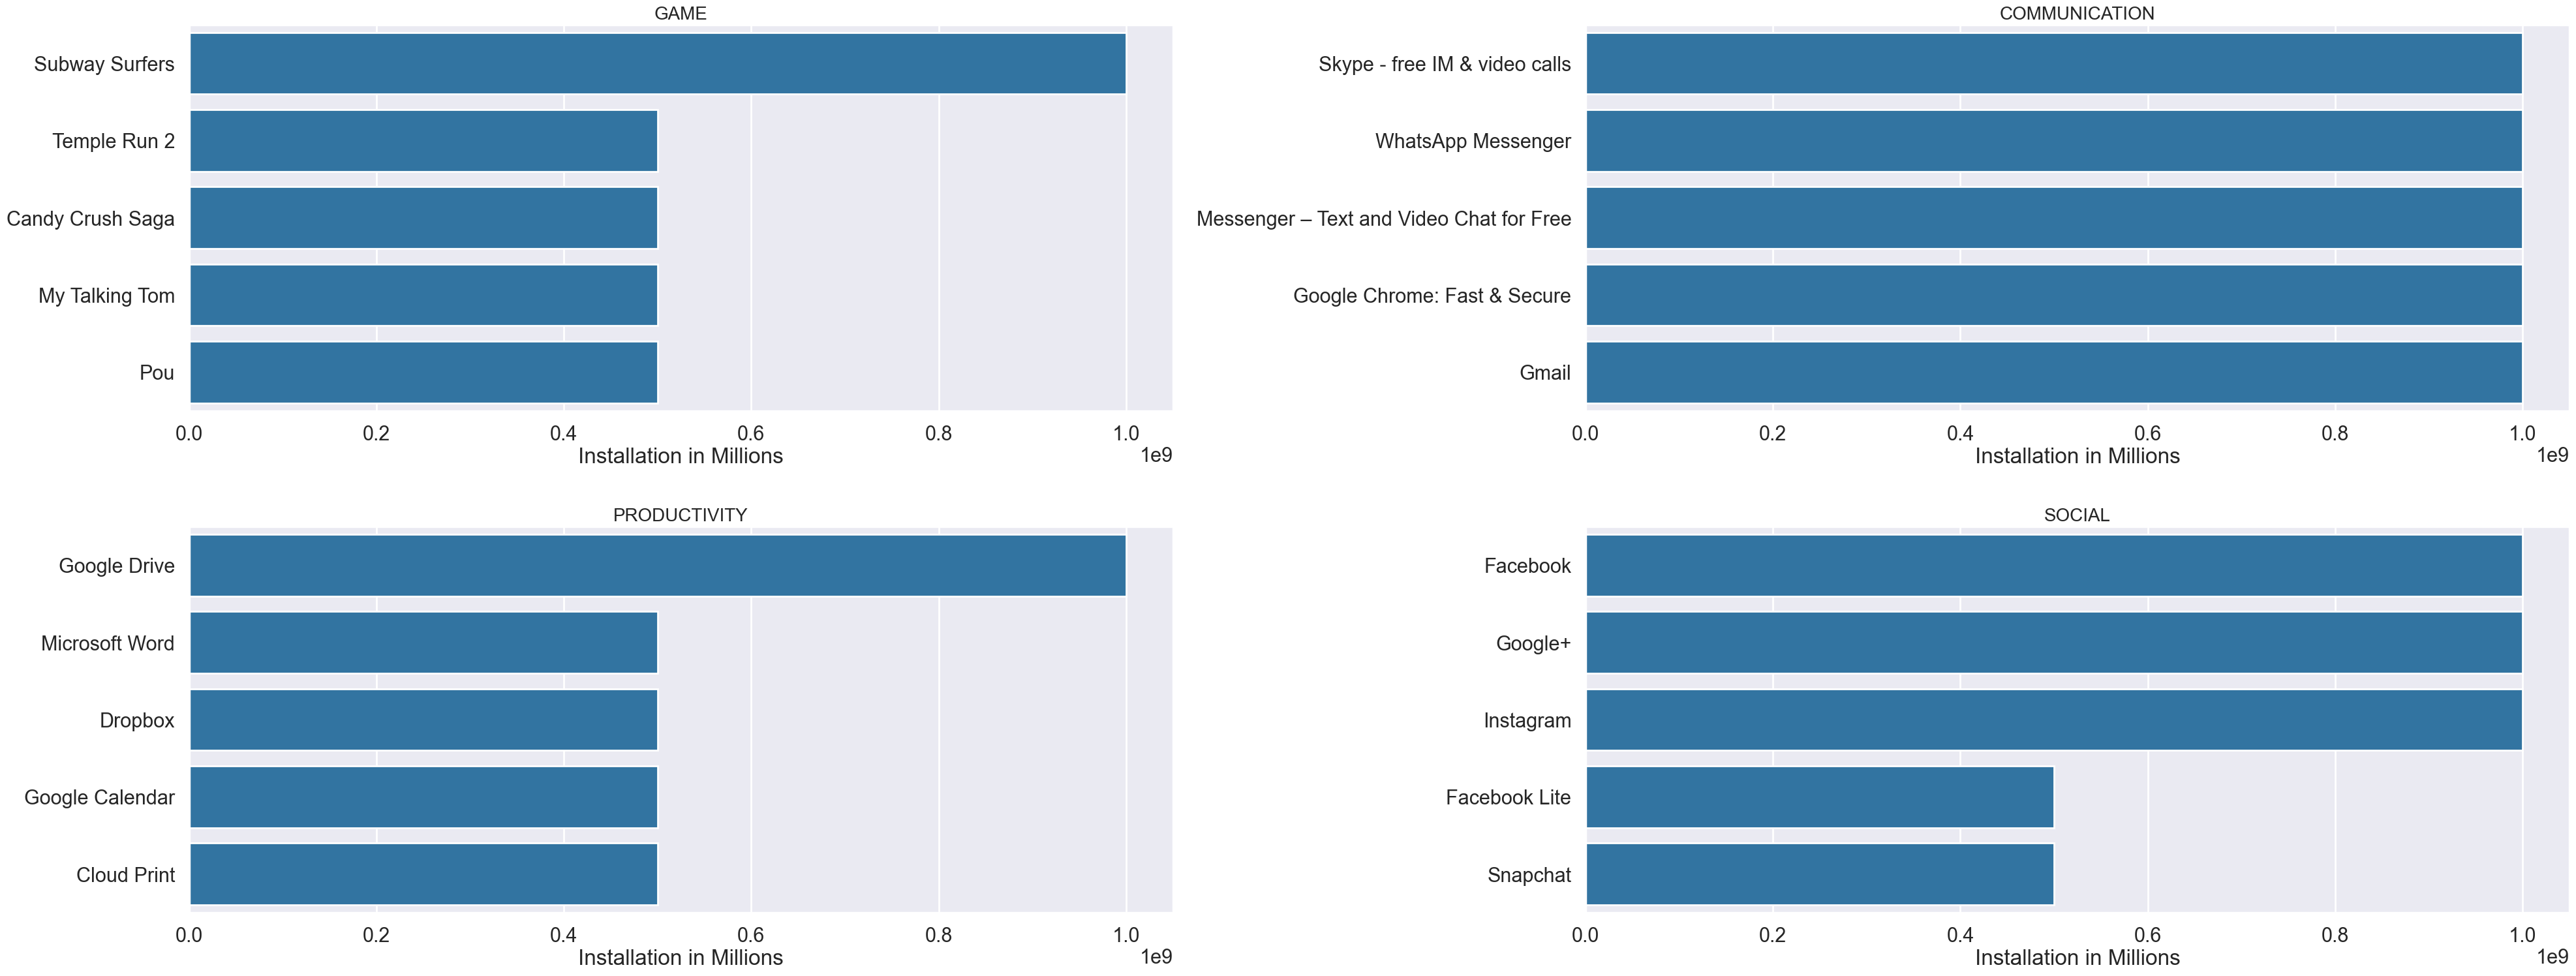

In [100]:
dfa = df_copy.groupby(['Category', 'App'])['Installs'].sum().reset_index()
# Groups data by Category and App
# Calculates total installs for each app
# reset_index() converts grouped index into columns

dfa = dfa.sort_values('Installs', ascending=False)
# Sorts apps by number of installs in descending order

apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL']
# Selected top categories for analysis

sns.set_context("poster")
# Increases font size suitable for presentations

sns.set_style("darkgrid")
# Applies dark grid background style

plt.figure(figsize=(40, 30))
# Creates a large figure to fit multiple subplots

for i, app in enumerate(apps):
    # Loop through selected categories with index

    df2 = dfa[dfa.Category == app]
    # Filters apps belonging to the current category

    df3 = df2.head(5)
    # Selects top 5 apps with highest installs in that category

    plt.subplot(4, 2, i + 1)
    # Creates subplot layout

    sns.barplot(data=df3, x='Installs', y='App')
    # Creates horizontal bar plot for top apps

    plt.xlabel('Installation in Millions')
    # Sets x-axis label

    plt.ylabel('')
    # Removes y-axis label

    plt.title(app, size=20)
    # Sets title as category name

plt.tight_layout()
# Adjusts spacing between subplots

plt.subplots_adjust(hspace=0.3)
# Adds vertical spacing between rows

plt.show()
# Displays the complete figure

## Insights
- Most popular game is Subway Surfers.
- Most popular communication app is Hangouts.
- Most popular productivity app is Google Drive.
- Most popular social app is Instagram.

## How many apps are there on Google Play Store which get 5 ratings??

In [101]:
rating = df_copy.groupby(['Category','Installs', 'App'])['Rating'] \
                .sum() \
                .sort_values(ascending=False) \
                .reset_index()
# Groups data by Category, Installs, and App
# Adds (sums) all Rating values for each app
# Sorts apps by total rating score in descending order
# Converts grouped index back into columns

toprating_apps = rating[rating.Rating == 5.0]
# Filters apps whose total rating value is exactly 5.0

print("Number of 5 rated apps", toprating_apps.shape[0])
# Prints how many apps have rating value equal to 5

toprating_apps.head(1)
# Displays the first 5-rated app

Number of 5 rated apps 271


,Category,Installs,App,Rating
0,FAMILY,10,DN Employee,5.0


## Result
- There are 271 five rated apps on Google Play store
- Top most is 'CT Brain Interpretation' from 'Family' Category

In [98]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
